# Вітаю на фінальному проєкті!
Протягом курсу ми навчились завантажувати дані в Python, трансформувати їх, чистити, агрегувати, знаходити з допомогою даних відповіді на наші питання, використовувати sql, а також Tableau! 
Задача фінального проєкту - продемонструвати той рівень роботи з даними, на якому Ви є зараз, показати, що Ви вмі
те робити.

## Робота з Excel файлом
Цей ноутбук буде присвячений аналізу даних з файла `Grocery DataBase.xlsx`. Так, це Excel файл, і ми можемо дуже просто завантажувати дані з нього у Python. Покажу пару команд для роботи з Excel файлом.

Для початку встановимо бібліотеку, яка потрібна для роботи з Excel файлами з pandas. Можна встановити тут, або в терміналі, але якщо Ви встановлюєте в терміналі, то після того треба перезапустити ядро (Kernel) ноутбуку, аби бібліотека точно підтягнулась. Іноді підтягується і без того, але це на випадок, що робити, якщо компілятор каже, що її не бачить.

In [1]:
#!pip install sidetable

In [2]:
#!pip install openpyxl

In [3]:
#!pip install colormaps

In [4]:
import colormaps as cmaps
import datetime as dt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sidetable
import statsmodels.api as sm
from scipy import stats as st
from scipy.stats import norm
from statsmodels.stats.weightstats import ztest  


In [5]:
%matplotlib inline
sns.set(rc = {'figure.figsize' : (16, 10)})

Ось так можемо переглянути, які є листки в Excel файлі:

In [6]:
# замініть на шлях до файлу на своєму комп`ютері
path_to_file = 'data/Grocery Database.xlsx'

In [7]:
#xl = pd.ExcelFile(path_to_file)
#xl.sheet_names

А так можемо зчитати конкретний листок:

In [8]:
#descr = xl.parse('Fact Summary')

In [9]:
#descr

Читати дані можна і з Pandas, але тут немає можливості переглянути наявні листки, а також довше відбувається читання даних.

In [10]:
df = pd.read_excel(path_to_file)
df['% Operating Cost'] = df['% Operating Cost'].astype('float64').round(decimals = 2)


In [11]:
df['% Operating Cost'].sort_values()

0        0.15
33626    0.15
33627    0.15
33628    0.15
33629    0.15
         ... 
16818    0.15
16819    0.15
16820    0.15
16822    0.15
50446    0.15
Name: % Operating Cost, Length: 50447, dtype: float64

In [12]:
x = df['% Operating Cost'].sum() 
x 

7567.049999999997

In [13]:
df.head()

,Receipt Number,Date,Year,Month,Time,Mobile Number,Membership ID,Loyalty Card Points,Age,Gender,...,GST,Gross Bill Amount,Payment Mode,Bank Name,% Profit Margin,% Operating Cost,% Product Cost,Profit Margin,Operating Cost,Product Cost
0,GIJ00001,2016-01-02,2016,1,10:08:03.260000,9793548581,MIDID0001,1,36,Male,...,0.1,13.32408,Card,Enterprise Bank,0.150,0.15,0.700,1.85400,1.8540,8.65200
1,GIJ00002,2016-01-02,2016,1,15:46:50.832000,9938441276,MIDID0002,2,54,Male,...,0.1,25.26480,Card,Philippine Veterans Bank,0.118,0.15,0.732,2.73760,3.4800,16.98240
2,GIJ00003,2016-01-02,2016,1,11:28:52.166000,9976742552,MIDID0003,1,16,Female,...,0.1,42.18786,Cash,BDO Unibank,0.147,0.15,0.703,1.95657,1.9965,9.35693
3,GIJ00003,2016-01-02,2016,1,11:28:52.166000,9976742552,MIDID0003,1,16,Female,...,0.1,42.18786,Cash,BDO Unibank,0.095,0.15,0.755,0.33440,0.5280,2.65760
4,GIJ00003,2016-01-02,2016,1,11:28:52.166000,9976742552,MIDID0003,2,16,Female,...,0.1,42.18786,Cash,BDO Unibank,0.120,0.15,0.730,0.52920,0.6615,3.21930


В файлі ви знайдете опис колонок і значення.   

**Задача**: Уявіть, що Вам дали цей набір даних з питанням "Що корисного ми можемо з них взяти для розвитку нашого бізнесу?". То Вам необхідно розказати бізнесу історію про ці дані у форматі
1. питання, яке Вас цікавить щодо цих даних як співробітника цього бізнесу, який дуже вболіває за його успіх, 
2. код для відповіді на це питання
3. висновки, які Ви зробили з огляду на результат виконання коду: які рішення ми можемо прийняти щодо подальших кроків в аналізі або які рекомендації Ви б дали бізнесу виходячи з результатів.

**Необхідно** 

1. поставити до даних _мінімум_ 10 бізнес-питань, при цьому зробивши   
- початковий аналіз даних: їх розмір, структура, наявність пропущених значень та що з ними зробити, зміна типів даних там, де це доречно зробити (наприклад, якщо колонка завантажилась як тип string, а з опису видно, що там має бути float - варто змінити тип) - ця частина не входить у бізнес-питання, але є необхідною при аналізі даних.  
- _мінімум_ 1 зведеної таблиці (pivot) або її аналога
- _мінімум_ 5 візуалізацій, 3 з яких мають різний тип (наприклад, scatter plot, line plot, pair plot)
- _мінімум_ 1 використання тестування статистичних гіпотез. Наприклад, порівняти, чи стат значимо відрізняється певний цікавий бізнесу показник для чоловіків і жінок. Важливо, що найбільш доречно це буде, якщо той показник, який порівнюємо між групами, справді має доволі незначну різницю. Але потренуватись можна і при наявності значної. Питання тут насправді що таке "значна")) І воно залежить від співвідношення розміру середнього і стандартного відхилення.

    В даному мінімум-наборі немає вимоги на використання SQL. Але якщо Вам хочеться потренуватись, то Ви можете це зробити скориставшись pandasql. 

    Питанням може бути як "Яка є кількість унікальних чеків в цьому наборі даних?" так і щось значно складніше. Якщо у Вас складне питання, і аби відповісти на нього Ви мали відповісти на 3 менших питання (зробити якісь трансформації над даними, подивитись щось), то це рахується як 3 питання з 10 необхідних у завданні. Звісно ж Ви можете зробити більше за встановлений мінімум - все буде перевірено :)

2. Розробити систему метрик для цього бізнесу (що нам цікаво вимірювати) і побудувати Tableau репорт відповідно до системи метрик. Опублікувати Tableau репорт на Tableau public і додати посилання на нього в ноутбуці з описом на кшталт "Візуалізацію у вигляді інтерактивного репорту даних можна знайти за посиланням".

По закінченню - завантажте ноутбук на git і додаємо посилання на ноутбук в здачу роботи в Kwiga. 
До речі, з часом, Вам може захотітись доповнити цей ноутбук, коли арсенал Ваших навичок по роботі з даними розшириться. І це буде чудова ідея!

**Успіхів!**

Let's analyze the data: we'll examine the nature of the data, its volume, type, and available fields. If necessary, we'll perform type conversions, handle missing values, and other related tasks.

In [14]:
display(df.dtypes)

Receipt Number                 object
Date                   datetime64[ns]
Year                            int64
Month                           int64
Time                           object
Mobile Number                   int64
Membership ID                  object
Loyalty Card Points             int64
Age                             int64
Gender                         object
City                           object
Country                        object
Category                       object
Sub_Category                   object
Items                          object
Brand                          object
Description                    object
Price                         float64
QTY                             int64
DISC                          float64
Amount                        float64
Net Bill Amount               float64
GST                           float64
Gross Bill Amount             float64
Payment Mode                   object
Bank Name                      object
% Profit Mar

In [15]:
display(df.shape)

(50447, 32)

In [16]:
df.Category.unique()

array(['Choco, Snacks, Sweets', 'Wines, Beers & Spirits',
       'Fruit & Vegetable', 'Pet Care', 'Meat & Seafood', 'Mother & Baby',
       'Bakery & Breakfast', 'Household', 'Beverages', 'Beauty',
       'Dairy, Chilled & Eggs', 'Frozen', 'Kitchen & Dining',
       'Party Supplies', 'Rice & Cooking Essentials', 'Health'],
      dtype=object)

In [17]:
df_category = df.groupby(['Category','Sub_Category'], observed = True).agg({'Sub_Category':'count'}).stb.subtotal()
display(df_category[:20])

Sub_Category
Bakery & Breakfast    Cereal & Protein Bars                  1015
                      Fresh Bread                            1608
                      Jams, Honey & Spreads                  1003
                      Oatmeals                               1030
                      Pastries & Treats                      1048
                      Sliced Bread                           1066
                      Bakery & Breakfast - subtotal          6770
Beauty                Bath & Body                            1296
                      Oral Care                              2155
                      skin care                              1754
                      Beauty - subtotal                      5205
Beverages             Chocolate, Malt & Hot Cereals           545
                      Iced Tea                                142
                      Juices & Coconut Water                  481
                      Sports & Energy drinks                  314
                      Tea                                     272
                      coffee                                  454
                      Beverages - subtotal                   2208
Choco, Snacks, Sweets Biscuits & Crackers                     719
                      Mints                                   123

We will convert all applicable  fields into categorical variables to optimize code execution speed.


In [18]:
def convert_to_category_type (df, columns_name: list):
    for el in columns_name:
       df[el] = df[el].astype('category')
    return df


In [19]:
list_data_category = ['Gender','City','Country','Category','Sub_Category','Payment Mode','Bank Name']
convert_to_category_type(df, list_data_category)

,Receipt Number,Date,Year,Month,Time,Mobile Number,Membership ID,Loyalty Card Points,Age,Gender,...,GST,Gross Bill Amount,Payment Mode,Bank Name,% Profit Margin,% Operating Cost,% Product Cost,Profit Margin,Operating Cost,Product Cost
0,GIJ00001,2016-01-02,2016,1,10:08:03.260000,9793548581,MIDID0001,1,36,Male,...,0.10,13.324080,Card,Enterprise Bank,0.150,0.15,0.700,1.85400,1.8540,8.65200
1,GIJ00002,2016-01-02,2016,1,15:46:50.832000,9938441276,MIDID0002,2,54,Male,...,0.10,25.264800,Card,Philippine Veterans Bank,0.118,0.15,0.732,2.73760,3.4800,16.98240
2,GIJ00003,2016-01-02,2016,1,11:28:52.166000,9976742552,MIDID0003,1,16,Female,...,0.10,42.187860,Cash,BDO Unibank,0.147,0.15,0.703,1.95657,1.9965,9.35693
3,GIJ00003,2016-01-02,2016,1,11:28:52.166000,9976742552,MIDID0003,1,16,Female,...,0.10,42.187860,Cash,BDO Unibank,0.095,0.15,0.755,0.33440,0.5280,2.65760
4,GIJ00003,2016-01-02,2016,1,11:28:52.166000,9976742552,MIDID0003,2,16,Female,...,0.10,42.187860,Cash,BDO Unibank,0.120,0.15,0.730,0.52920,0.6615,3.21930
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50442,GSW01533,2019-12-28,2019,12,20:59:27.302000,9893317658,MIDSG0630,21,28,Female,...,0.07,79.358048,Card,Philippine National bank,0.141,0.15,0.709,0.87420,0.9300,4.39580
50443,GSW01534,2019-12-29,2019,12,13:14:45.030000,9809301701,MIDSG0293,41,28,Female,...,0.07,11.292352,Wallet,Philippine National bank,0.068,0.15,0.782,0.73984,1.6320,8.50816
50444,GSW01535,2019-12-30,2019,12,10:01:32.657000,9840124138,MIDSG0150,41,62,Female,...,0.07,14.999688,Card,BDO Unibank,0.109,0.15,0.741,0.43273,0.5955,2.94177
50445,GSW01535,2019-12-30,2019,12,10:01:32.657000,9840124138,MIDSG0150,41,62,Female,...,0.07,14.999688,Card,BDO Unibank,0.148,0.15,0.702,0.60680,0.6150,2.87820


In [20]:
df.isna().sum()

Receipt Number         0
Date                   0
Year                   0
Month                  0
Time                   0
Mobile Number          0
Membership ID          0
Loyalty Card Points    0
Age                    0
Gender                 0
City                   0
Country                0
Category               0
Sub_Category           0
Items                  0
Brand                  0
Description            0
Price                  0
QTY                    0
DISC                   0
Amount                 0
Net Bill Amount        0
GST                    0
Gross Bill Amount      0
Payment Mode           0
Bank Name              0
% Profit Margin        0
% Operating Cost       0
% Product Cost         0
Profit Margin          0
Operating Cost         0
Product Cost           0
dtype: int64

In [21]:
df[['Age','Price','QTY','Amount','Net Bill Amount','GST','DISC','Gross Bill Amount']].describe()

,Age,Price,QTY,Amount,Net Bill Amount,GST,DISC,Gross Bill Amount
count,50447.000000,50447.000000,50447.000000,50447.000000,50447.000000,50447.000000,50447.000000,50447.000000
mean,35.801772,7.424184,1.548179,11.167962,66.695212,0.085553,0.029938,72.378916
std,14.020367,4.753588,0.648461,9.227162,45.269851,0.023568,0.014230,49.093636
min,15.000000,0.840000,1.000000,0.798000,0.978500,0.060000,0.010000,1.037210
25%,23.000000,4.280000,1.000000,5.213600,35.328000,0.070000,0.020000,38.615940
50%,35.000000,5.980000,2.000000,8.632800,58.586500,0.070000,0.030000,63.909120
75%,47.000000,9.470000,2.000000,14.016000,90.585000,0.100000,0.040000,98.076440
max,75.000000,40.330000,9.000000,299.827200,527.668000,0.120000,0.050000,559.328080


In [22]:
df['% Operating Cost'].mean().round(2)

0.15

In [23]:
df['% Operating Cost'].value_counts()

% Operating Cost
0.15    50447
Name: count, dtype: int64

In [24]:
df['% Operating Cost'].describe().round(2)

count    50447.00
mean         0.15
std          0.00
min          0.15
25%          0.15
50%          0.15
75%          0.15
max          0.15
Name: % Operating Cost, dtype: float64

In [25]:
df['% Operating Cost'].sort_values()

0        0.15
33626    0.15
33627    0.15
33628    0.15
33629    0.15
         ... 
16818    0.15
16819    0.15
16820    0.15
16822    0.15
50446    0.15
Name: % Operating Cost, Length: 50447, dtype: float64

In [26]:
df[['% Profit Margin', '% Product Cost','Profit Margin','Operating Cost','Product Cost']].describe()

,% Profit Margin,% Product Cost,Profit Margin,Operating Cost,Product Cost
count,50447.000000,50447.000000,50447.000000,50447.000000,50447.000000
mean,0.105550,0.744450,1.201682,1.726851,8.583809
std,0.029403,0.029403,1.063545,1.426844,7.134957
min,0.051000,0.700000,0.067840,0.126000,0.609840
25%,0.083000,0.722000,0.545600,0.805500,4.082890
50%,0.109000,0.741000,0.928200,1.329000,6.648660
75%,0.128000,0.767000,1.505270,2.178000,10.828800
max,0.150000,0.799000,26.234880,46.848000,239.237120


We will convert the time and date fields into a convenient format and add two additional fields: week number and day of the week when sales were conducted. These fields will be used in our further analysis.

In [27]:
df['Year'].unique()

array([2016, 2017, 2018, 2019], dtype=int64)

In [28]:
df["Year"] = pd.to_datetime(df["Year"], format ="%Y").dt.strftime('%Y')
df["Month"] = pd.to_datetime(df["Month"], format ="%m").dt.strftime('%m')


In [29]:
#Add week number columт
df.insert(3, "Week", df["Date"].dt.strftime('%W'))

In [30]:
#Add weekday columт
df.insert(3, "Weekday", df["Date"].dt.strftime('%a'))
df

,Receipt Number,Date,Year,Weekday,Week,Month,Time,Mobile Number,Membership ID,Loyalty Card Points,...,GST,Gross Bill Amount,Payment Mode,Bank Name,% Profit Margin,% Operating Cost,% Product Cost,Profit Margin,Operating Cost,Product Cost
0,GIJ00001,2016-01-02,2016,Sat,00,01,10:08:03.260000,9793548581,MIDID0001,1,...,0.10,13.324080,Card,Enterprise Bank,0.150,0.15,0.700,1.85400,1.8540,8.65200
1,GIJ00002,2016-01-02,2016,Sat,00,01,15:46:50.832000,9938441276,MIDID0002,2,...,0.10,25.264800,Card,Philippine Veterans Bank,0.118,0.15,0.732,2.73760,3.4800,16.98240
2,GIJ00003,2016-01-02,2016,Sat,00,01,11:28:52.166000,9976742552,MIDID0003,1,...,0.10,42.187860,Cash,BDO Unibank,0.147,0.15,0.703,1.95657,1.9965,9.35693
3,GIJ00003,2016-01-02,2016,Sat,00,01,11:28:52.166000,9976742552,MIDID0003,1,...,0.10,42.187860,Cash,BDO Unibank,0.095,0.15,0.755,0.33440,0.5280,2.65760
4,GIJ00003,2016-01-02,2016,Sat,00,01,11:28:52.166000,9976742552,MIDID0003,2,...,0.10,42.187860,Cash,BDO Unibank,0.120,0.15,0.730,0.52920,0.6615,3.21930
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50442,GSW01533,2019-12-28,2019,Sat,51,12,20:59:27.302000,9893317658,MIDSG0630,21,...,0.07,79.358048,Card,Philippine National bank,0.141,0.15,0.709,0.87420,0.9300,4.39580
50443,GSW01534,2019-12-29,2019,Sun,51,12,13:14:45.030000,9809301701,MIDSG0293,41,...,0.07,11.292352,Wallet,Philippine National bank,0.068,0.15,0.782,0.73984,1.6320,8.50816
50444,GSW01535,2019-12-30,2019,Mon,52,12,10:01:32.657000,9840124138,MIDSG0150,41,...,0.07,14.999688,Card,BDO Unibank,0.109,0.15,0.741,0.43273,0.5955,2.94177
50445,GSW01535,2019-12-30,2019,Mon,52,12,10:01:32.657000,9840124138,MIDSG0150,41,...,0.07,14.999688,Card,BDO Unibank,0.148,0.15,0.702,0.60680,0.6150,2.87820


We need to verify the accuracy of the exported data. To do this, based on the basic values (Price, Quantity, Discount, etc.), we will calculate the Total Product Cost, Total Purchase Amount, and compare these calculated values with the corresponding exported ones.

In [31]:
df['Amount_Evoluate'] = df.Price*df.QTY*(1 - df.DISC)
df['Gross_Amount_Evoluate'] = df['Amount_Evoluate']*(1 + df['GST'])

In [32]:
df_Receipt_Number = (
    df.groupby(["Receipt Number","Date", "Year", "Week","Weekday", "Age", "Gender", "Country", "City","Payment Mode", "Bank Name"], as_index=False, observed = True)
    .agg({
        "Amount": "sum",
        "Amount_Evoluate": "sum", 
        "Net Bill Amount": "mean", 
        "Gross_Amount_Evoluate":"sum",
        "Gross Bill Amount": "mean",
        "Profit Margin": "sum",
        "Operating Cost": "sum",
        "Product Cost": "sum"
    })
    .rename(
        columns={
            "Amount_Evoluate": "NBA_Evoluate",
            "Net Bill Amount": "NBA_Download",
            "Gross_Amount_Evoluate": "GBA_Evoluate",
            "Gross Bill Amount": "GBA_Download",
            "Amount": "Amount_Download",
        }
    )
)

df_Receipt_Number["Compare_NB"] = np.isclose(
    df_Receipt_Number["NBA_Evoluate"],
    df_Receipt_Number["NBA_Download"],
)

df_Receipt_Number["Compare_GB"] = np.isclose(
    df_Receipt_Number["GBA_Evoluate"],
    df_Receipt_Number["GBA_Download"],
)

df_Receipt_Number["Compare_Amount"] = np.isclose(
    df_Receipt_Number["NBA_Evoluate"],
    df_Receipt_Number["Amount_Download"],
)

display(df_Receipt_Number)

,Receipt Number,Date,Year,Week,Weekday,Age,Gender,Country,City,Payment Mode,...,NBA_Evoluate,NBA_Download,GBA_Evoluate,GBA_Download,Profit Margin,Operating Cost,Product Cost,Compare_NB,Compare_GB,Compare_Amount
0,GIJ00001,2016-01-02,2016,00,Sat,36,Male,Indonesia,Jakarta,Card,...,12.1128,12.1128,13.324080,13.324080,1.85400,1.8540,8.65200,True,True,True
1,GIJ00002,2016-01-02,2016,00,Sat,54,Male,Indonesia,Jakarta,Card,...,22.9680,22.9680,25.264800,25.264800,2.73760,3.4800,16.98240,True,True,True
2,GIJ00003,2016-01-02,2016,00,Sat,16,Female,Indonesia,Jakarta,Cash,...,30.7692,38.3526,33.846120,42.187860,3.82522,4.6620,22.59278,False,False,True
3,GIJ00004,2016-01-03,2016,00,Sun,20,Female,Indonesia,Jakarta,Cash,...,24.2452,21.1974,26.669720,23.317140,3.13592,3.7110,17.89308,False,False,True
4,GIJ00005,2016-01-03,2016,00,Sun,49,Male,Indonesia,Jakarta,Cash,...,6.1275,6.1275,6.740250,6.740250,0.56760,0.9675,4.91490,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13043,GSW01531,2019-12-28,2019,51,Sat,20,Male,Singapore,Woodlands,Card,...,21.1848,21.1848,22.667736,22.667736,1.59432,3.2760,16.96968,True,True,True
13044,GSW01532,2019-12-28,2019,51,Sat,35,Female,Singapore,Woodlands,Cash,...,9.4090,9.4090,10.067630,10.067630,1.05730,1.4550,7.18770,True,True,True
13045,GSW01533,2019-12-28,2019,51,Sat,28,Female,Singapore,Woodlands,Card,...,74.1664,74.1664,79.358048,79.358048,8.46462,11.3520,55.86338,True,True,True
13046,GSW01534,2019-12-29,2019,51,Sun,28,Female,Singapore,Woodlands,Wallet,...,10.5536,10.5536,11.292352,11.292352,0.73984,1.6320,8.50816,True,True,True


The number of rows in the DataFrame df_Receipt_Number should match the number of unique values in the column Receipt_Number of the original file. To verify this fact, we'll execute the command below.

In [33]:
df['Receipt Number'].unique().size

13048

Let's find the percentage of receipts where there is a discrepancy between the calculated and exported total amounts.

In [34]:
df_Receipt_Number.agg(
    {
        'Compare_NB':"value_counts",
        'Compare_GB':"value_counts",
        'Compare_Amount':"value_counts"
    }
)
    

,Compare_NB,Compare_GB,Compare_Amount
True,10225,10225,13048.0
False,2823,2823,NaN


We'll assess the numerical deviation of the data by drawing the following histograms: Loaded Total Amount, Calculated Total Amount, and the difference between these values.

In [35]:
def saldo (arg_x, arg_y):
    return arg_x - arg_y

''

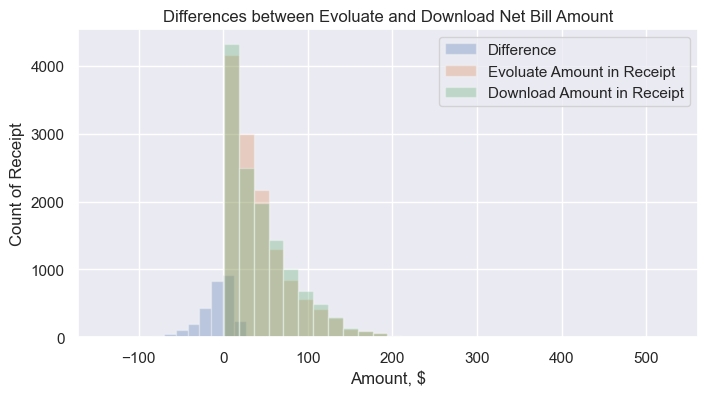

In [36]:
bins = 15
plt.figure(figsize=(8,4))
plt.xlabel('Amount, $')
plt.ylabel('Count of Receipt')
plt.title('Differences between Evoluate and Download Net Bill Amount')
plt.grid(True)

plt.hist(
    [
        saldo(x, y) for x, y in zip(df_Receipt_Number['NBA_Evoluate'],
                                    df_Receipt_Number['NBA_Download']) if not (np.isclose(x, y))
    ], bins, alpha = 0.3, label = 'Difference')

plt.hist(df_Receipt_Number['NBA_Evoluate'], bins = 30, alpha = 0.3, label = 'Evoluate Amount in Receipt')

plt.hist(df_Receipt_Number['NBA_Download'], bins = 30, alpha = 0.3, label = 'Download Amount in Receipt')


plt.legend(loc='upper right')
;

Since all values in the column Compare_Amount are True, unlike Compare_NB and Compare_GB, it implies that the columns Price and QTY were loaded correctly. One could hypothesize that there might be some services in the receipts (such as delivery/service maintenance/commission for services) that were not exported to the file but were reflected in the total transaction amounts. In such a case, the calculated total amounts would be less than the exported ones, which is not confirmed by our analysis (see the graph and calculations). This could be one of the reasons but not the only one. Nonetheless, since we are analyzing sales and our analysis indicates that both quantity and price were exported correctly, we will proceed based on this data. We will use the calculated values for the total amounts of the receipts.

In [37]:
df_clean_receipt = df_Receipt_Number.drop(
    ['NBA_Download','GBA_Download','Compare_NB','Compare_GB','Compare_Amount','Amount_Download'],
    axis ="columns")

In [38]:
df_clean_receipt.rename(columns = {"NBA_Evoluate": "NetBillAmount", "GBA_Evoluate": "GrossBillAmount"}, inplace = True)

We will use the DataFrame df_clean_receipt for analyzing the total amount of the receipts.

Parallelly, we will prepare one more DataFrame df_clean to store information about product categories and the cost of goods. We will use this DataFrame for product analysis. To do this, from the original DataFrame, we will remove all unnecessary columns: GROSS and NET columns, which contain total amounts for each receipt.

In [39]:
df_clean = df.drop(["Gross Bill Amount", "Net Bill Amount", "Amount_Evoluate", "Gross_Amount_Evoluate"], axis ="columns")

In [40]:
display(df_clean)

,Receipt Number,Date,Year,Weekday,Week,Month,Time,Mobile Number,Membership ID,Loyalty Card Points,...,Amount,GST,Payment Mode,Bank Name,% Profit Margin,% Operating Cost,% Product Cost,Profit Margin,Operating Cost,Product Cost
0,GIJ00001,2016-01-02,2016,Sat,00,01,10:08:03.260000,9793548581,MIDID0001,1,...,12.1128,0.10,Card,Enterprise Bank,0.150,0.15,0.700,1.85400,1.8540,8.65200
1,GIJ00002,2016-01-02,2016,Sat,00,01,15:46:50.832000,9938441276,MIDID0002,2,...,22.9680,0.10,Card,Philippine Veterans Bank,0.118,0.15,0.732,2.73760,3.4800,16.98240
2,GIJ00003,2016-01-02,2016,Sat,00,01,11:28:52.166000,9976742552,MIDID0003,1,...,13.1769,0.10,Cash,BDO Unibank,0.147,0.15,0.703,1.95657,1.9965,9.35693
3,GIJ00003,2016-01-02,2016,Sat,00,01,11:28:52.166000,9976742552,MIDID0003,1,...,3.4848,0.10,Cash,BDO Unibank,0.095,0.15,0.755,0.33440,0.5280,2.65760
4,GIJ00003,2016-01-02,2016,Sat,00,01,11:28:52.166000,9976742552,MIDID0003,2,...,4.3659,0.10,Cash,BDO Unibank,0.120,0.15,0.730,0.52920,0.6615,3.21930
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50442,GSW01533,2019-12-28,2019,Sat,51,12,20:59:27.302000,9893317658,MIDSG0630,21,...,6.0760,0.07,Card,Philippine National bank,0.141,0.15,0.709,0.87420,0.9300,4.39580
50443,GSW01534,2019-12-29,2019,Sun,51,12,13:14:45.030000,9809301701,MIDSG0293,41,...,10.5536,0.07,Wallet,Philippine National bank,0.068,0.15,0.782,0.73984,1.6320,8.50816
50444,GSW01535,2019-12-30,2019,Mon,52,12,10:01:32.657000,9840124138,MIDSG0150,41,...,3.9303,0.07,Card,BDO Unibank,0.109,0.15,0.741,0.43273,0.5955,2.94177
50445,GSW01535,2019-12-30,2019,Mon,52,12,10:01:32.657000,9840124138,MIDSG0150,41,...,4.0590,0.07,Card,BDO Unibank,0.148,0.15,0.702,0.60680,0.6150,2.87820


TASK: What is the quantity of purchases attributed to different subcategories of products in different countries and cities? We will evaluate this based on both the quantity of purchases (number of units of goods in the receipt) and the purchase amount.

In [41]:
pivot_category  = df_clean.pivot_table(columns = "City",
                              index=["Category"],
                              values=["QTY","Amount"],
                              aggfunc= {"QTY": "sum", "Amount": "sum"}
                             ).round(2)
pivot_category.style.background_gradient(cmap = 'viridis',axis=0)

CONCLUSION: The top three categories in terms of both the quantity of purchases and the total purchase amount across all cities are Bakery & Breakfast, Beauty, and Frozen.

TASK: Let's now examine the statistics for the top three categories that lead in terms of the total purchase amount.

In [42]:
cat_filter = (df_clean.Category == "Bakery & Breakfast") | (df_clean.Category ==  "Beauty") | (df_clean.Category == "Frozen")

df_clean[cat_filter].groupby(["Category", "City"],
                             observed = True).agg(
                                                { 
                                                   "Amount": ["min", "mean", "max", "count"],
                                                   "QTY": ["min", "mean", "max", "count"]
                                                }).round(4)


Amount                          QTY          \
                                    min     mean       max count min    mean   
Category           City                                                        
Bakery & Breakfast Bedok         1.0176   7.7912   56.4480  1678   1  1.5256   
                   Jakarta       0.9880   8.0264   51.5872  1208   1  1.5811   
                   Kuala Lumpur  0.9785   7.8041   45.2200  1480   1  1.5628   
                   Manila        0.9898   7.7685   58.2912  1638   1  1.5403   
                   Woodlands     1.0282   7.9872   36.7242   766   1  1.5927   
Beauty             Bedok         1.9190  15.2661  107.5550  1216   1  1.5436   
                   Jakarta       2.0273  14.9387  117.6021   944   1  1.5434   
                   Kuala Lumpur  1.9392  15.1826   76.1166  1162   1  1.5585   
                   Manila        1.9296  14.8968  102.8160  1274   1  1.5290   
                   Woodlands     2.0736  16.2548   91.9075   609   1  1.6355   
Frozen             Bedok         0.8316  11.6046   68.2492  1435   1  1.5296   
                   Jakarta       2.0592  11.5236   66.1485  1249   1  1.5741   
                   Kuala Lumpur  0.7980  12.0850  168.3400  1351   1  1.5959   
                   Manila        2.0188  11.0252   53.5472  1547   1  1.4829   
                   Woodlands     2.0235  12.1680  105.0510   811   1  1.5980   

                                           
                                max count  
Category           City                    
Bakery & Breakfast Bedok          8  1678  
                   Jakarta        7  1208  
                   Kuala Lumpur   8  1480  
                   Manila         8  1638  
                   Woodlands      6   766  
Beauty             Bedok          8  1216  
                   Jakarta        7   944  
                   Kuala Lumpur   9  1162  
                   Manila         8  1274  
                   Woodlands      8   609  
Frozen             Bedok          7  1435  
                   Jakarta        6  1249  
                   Kuala Lumpur   8  1351  
                   Manila         8  1547  
                   Woodlands      7   811

CONCLUSION: The analysis conducted indicates that both the average cost of goods in this category per receipt and the average quantity of these goods per receipt are consistent across different cities.

TASK: Let's construct a histogram depicting the distribution of receipt amounts for each city over the entire period.


In [43]:
df_clean_receipt["Receipt Number"].unique().size

13048

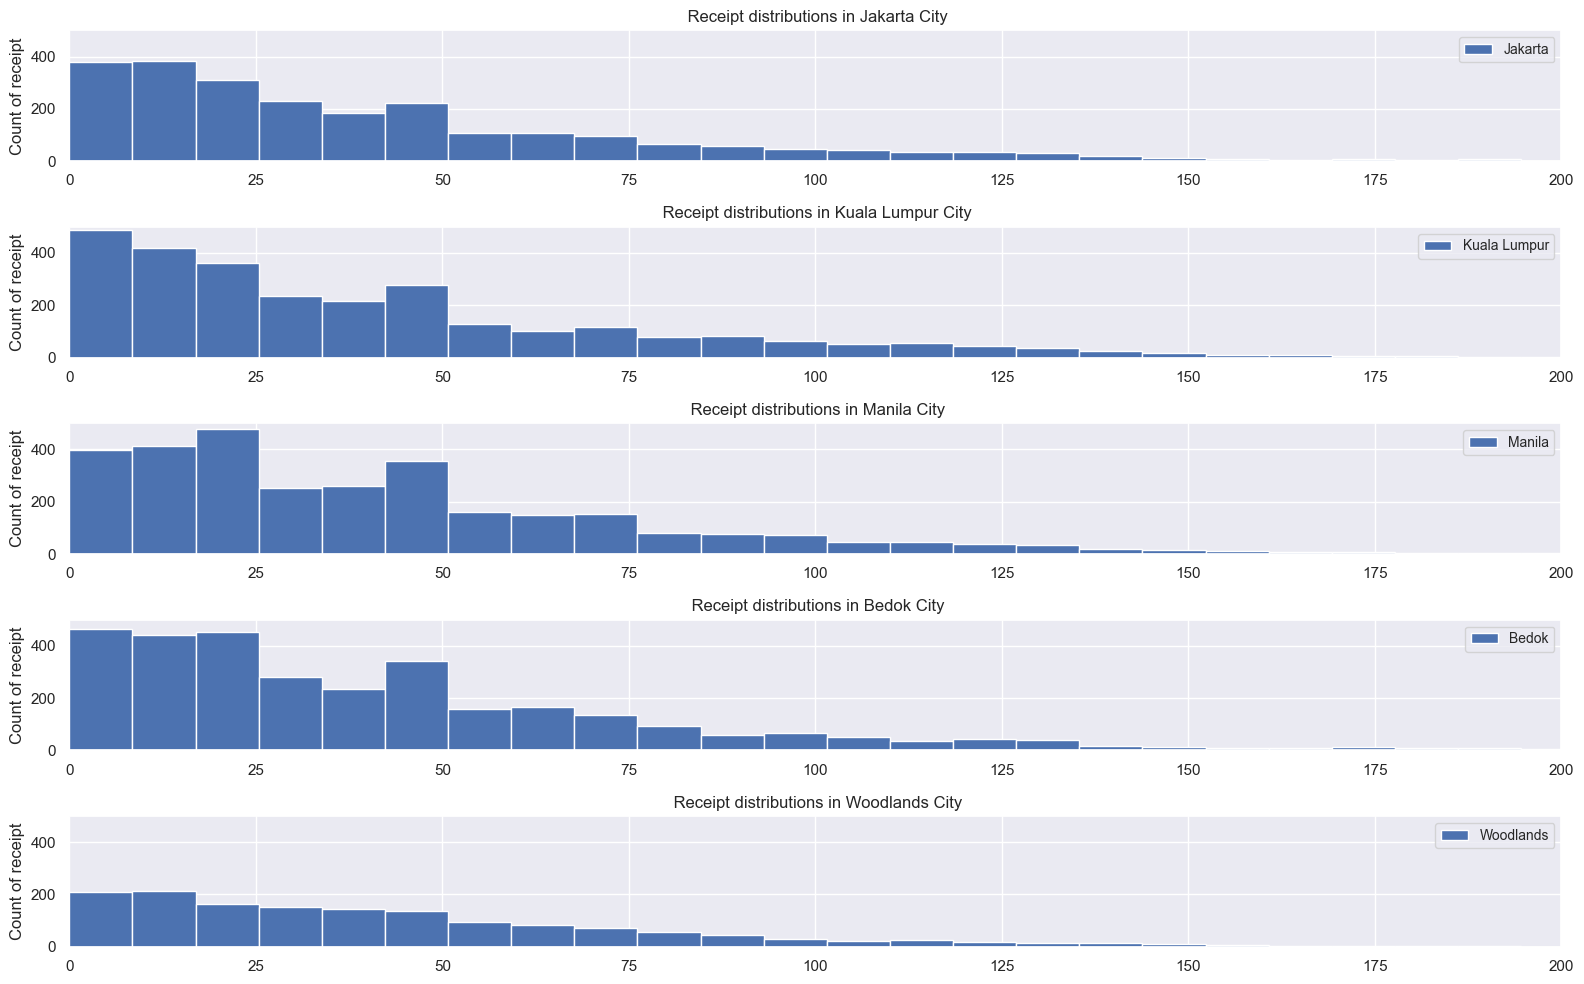

In [44]:
number_city = len(df_clean_receipt["City"].unique())

for el in enumerate(df_clean_receipt["City"].unique()):
    plt.subplot(number_city, 1, el[0]+1)
    plt.hist(df_clean_receipt[df_clean_receipt["City"] == el[1]]["NetBillAmount"], bins = 26, range = (0, 220), label=el[1])
    plt.legend(fontsize=10)
    plt.grid(which="minor", linestyle=':')
    plt.xlabel('')
    plt.ylabel('Count of receipt')
    plt.title(f' Receipt distributions in {el[1]} City')
    plt.ylim([0., 500])
    plt.xlim([0., 200])


plt.tight_layout()

In [45]:
df_clean_receipt.groupby(by = "City", observed = True, as_index = False )["NetBillAmount"].describe()

,City,count,mean,std,min,25%,50%,75%,max
0,Bedok,3164.0,42.877630,38.342096,1.2255,15.0443,32.88590,59.052000,347.5955
1,Jakarta,2419.0,42.585201,40.319681,1.0176,13.6693,30.76920,58.674450,356.5920
2,Kuala Lumpur,2836.0,42.743073,40.921652,0.9785,13.1866,31.31865,59.266475,527.6680
3,Manila,3094.0,43.305591,37.682352,1.0791,16.5792,33.84920,59.310900,445.4406
4,Woodlands,1535.0,45.280065,41.061606,0.9999,15.8064,34.86500,61.876800,494.1471


CONCLUSION 3: After analyzing the constructed histograms of distribution and statistics, we can draw the following conclusions:
1. 
The average receipt amount is approximately the same across all citie
2. .
Woodlands has the fewest purchases. The marketing department may need to work on increasing the number of customers in this city.

TASK: Let's analyze indicators such as average margin, operating expenses, as well as examine how many unique customers visited our stores and how many days they operated in a year.






In [46]:
df_city = df_clean_receipt[["Year","Date","Receipt Number", "City"]].groupby(
    by=["Year","City"],
    observed=True,
    as_index=False
).agg({
    "Receipt Number":"count",
}).rename(
    columns=({
        "Receipt Number":"Count"
    })
)
""".merge(
    df_clean_receipt[["City", "Date"]].groupby(
        by=["City"],
        observed=True,
        as_index=False)
    .agg({
        "Date": "min"
    }),
    on="City"
).merge(
    df_clean_receipt[["City", "Date"]].groupby(
        by=["City"],
        observed=True,
        as_index=False)
    .agg({
        "Date": "max"
    }),
    on="City"
).rename(
    columns={
        "Date_x":"Satrt_date",
        "Date_y":"End_date"}
)
"""


df_city

,Year,City,Count
0,2016,Bedok,658
1,2016,Jakarta,519
2,2016,Kuala Lumpur,555
3,2016,Manila,580
4,2016,Woodlands,275
5,2017,Bedok,774
6,2017,Jakarta,549
7,2017,Kuala Lumpur,666
8,2017,Manila,699
9,2017,Woodlands,379


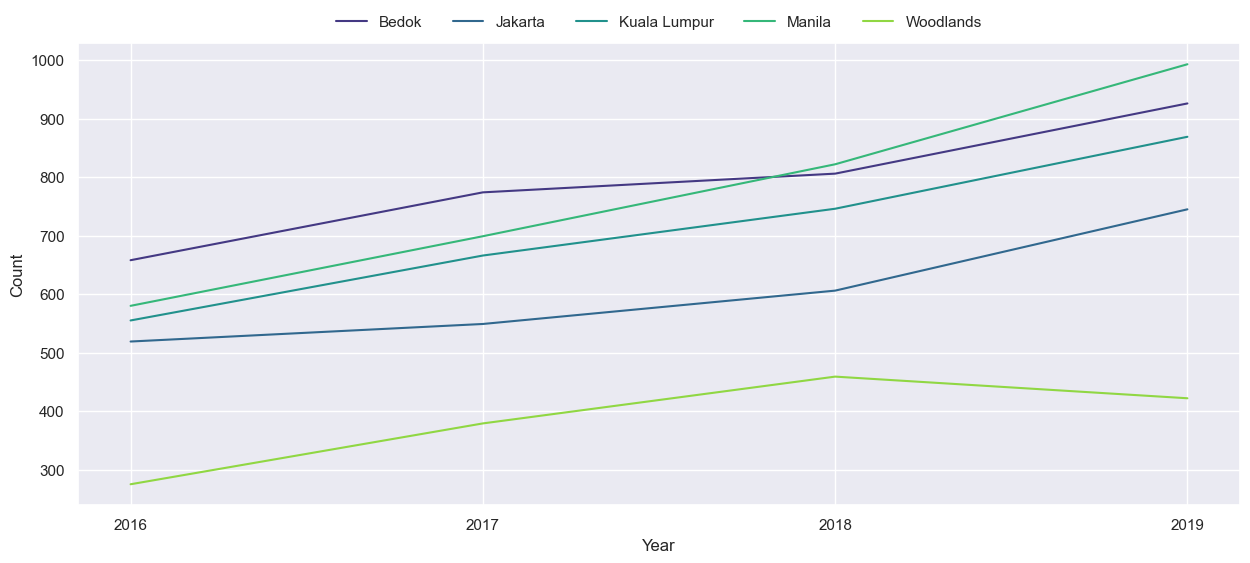

In [47]:
sns.set_style("darkgrid")
sns.set_theme(rc={'figure.figsize':(15,6)})
g = sns.lineplot(data=df_city, x="Year", y="Count", hue="City", estimator = None,
                  palette="viridis")
sns.move_legend(
    g, "lower center", bbox_to_anchor=(.5, 1), ncol=len(df_city["City"].unique()),
    title=None, frameon=False,
)


CONCLUSION: Based on the data obtained, it appears that the stores operated for the same period, but the number of customers (receipts) in the Woodlands store is significantly lower. This could have occurred if, for example, the store does not operate on certain specific days.




TASK: Let's verify our hypothesis by examining whether the stores operated continuously or if there were days during the period under review when the stores were closed, i.e., the number of receipts was 0 for the day.




In [48]:
df_shedule = df_clean_receipt[["City", "Year", "Week", "Weekday", "Receipt Number"]].groupby(
    by=["City", "Year", "Week", "Weekday"],
    observed=True,
    as_index=False
)["Receipt Number"].count().rename(
    columns={"Receipt Number": "Receipt_count"}
)
df_shedule

,City,Year,Week,Weekday,Receipt_count
0,Bedok,2016,00,Fri,4
1,Bedok,2016,00,Sun,2
2,Bedok,2016,01,Fri,5
3,Bedok,2016,01,Mon,2
4,Bedok,2016,01,Sat,4
...,...,...,...,...,...
5952,Woodlands,2019,51,Sun,1
5953,Woodlands,2019,51,Thu,1
5954,Woodlands,2019,51,Tue,2
5955,Woodlands,2019,51,Wed,1


In [49]:
df_shedule.Weekday = pd.Categorical(df_shedule.Weekday, categories=["Mon", "Tue", "Wed", "Thu", "Fri", "Sat","Sun"])


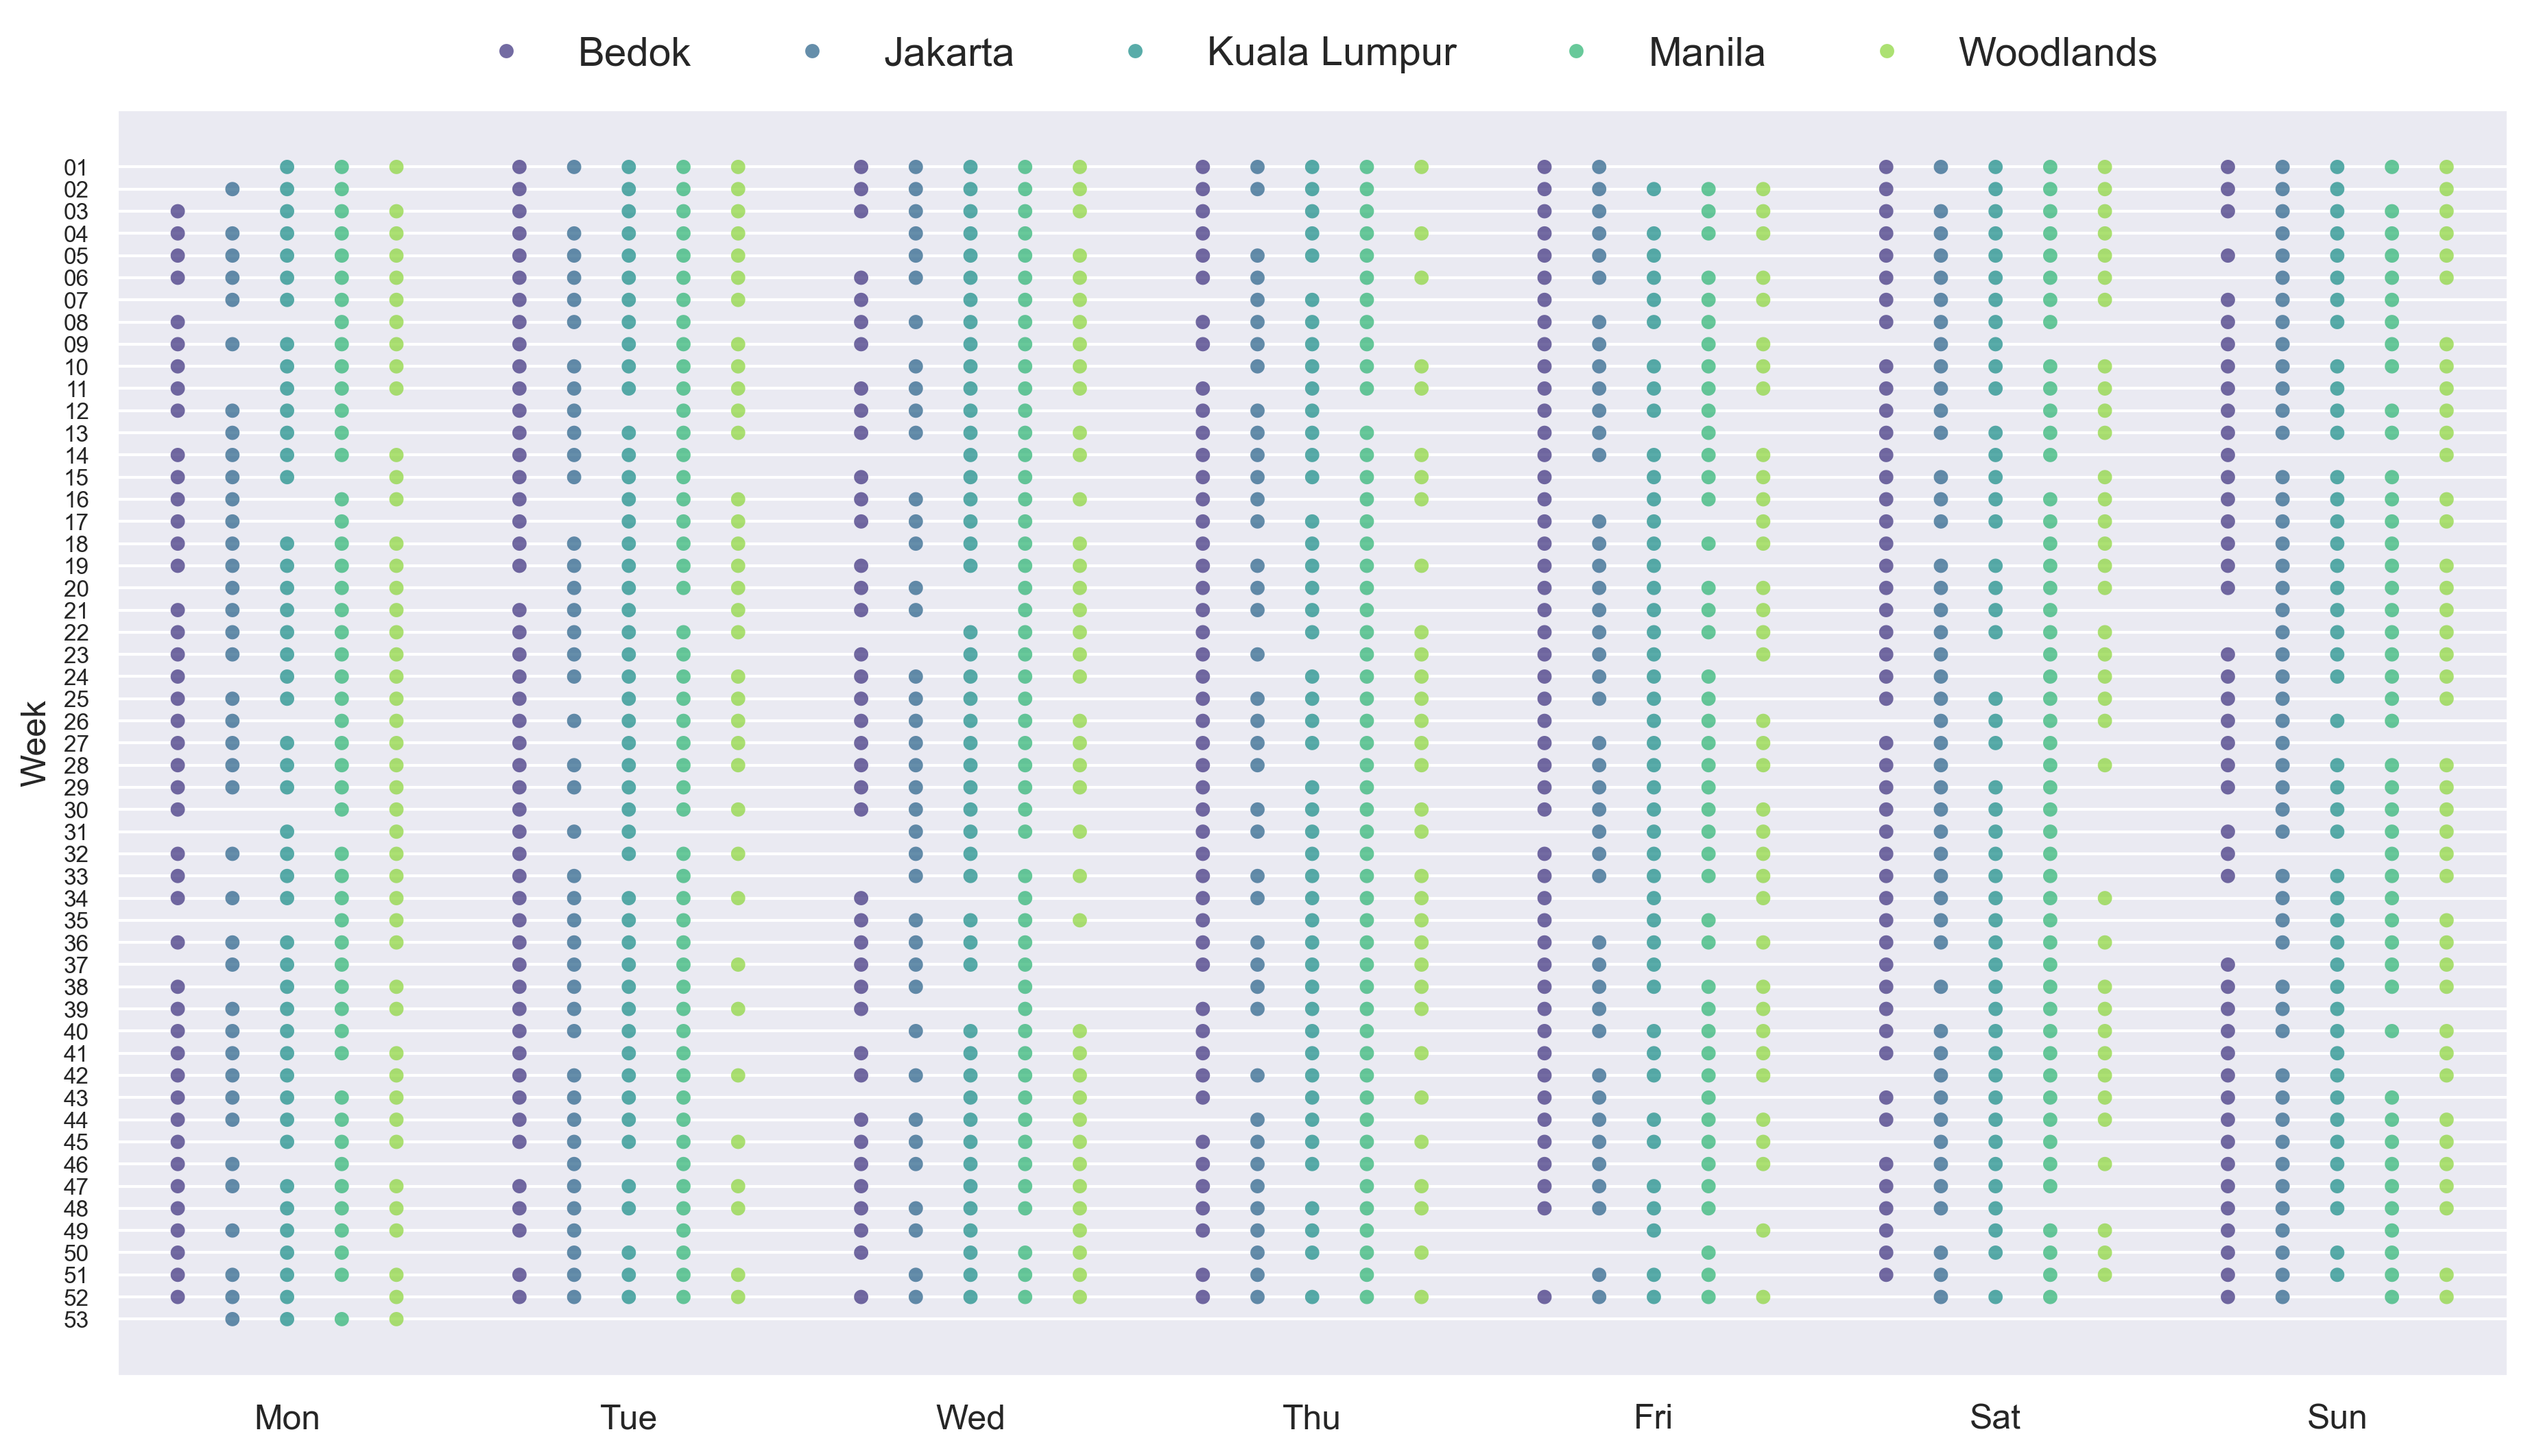

In [50]:

df_fiter =(df_shedule["Year"] == pd.to_datetime('2018', format='%Y').strftime('%Y')) 

sns.set_style("darkgrid")
plt.figure(figsize=(15,8), dpi=300)

g = sns.stripplot(
    data=df_shedule[df_fiter], palette="viridis",
    y="Week", x="Weekday", hue="City", alpha=0.75,
    size=5,jitter=False, dodge=True
)

sns.move_legend(
    g, "lower center", fontsize="14", bbox_to_anchor=(.5, 1), ncol=len(df_shedule["City"].unique()),
    title=None, frameon=False)


plt.yticks(fontsize=8)
plt.xticks(fontsize=12)


g.set(xlabel = "",
      ylabel = "Week");

      


In [51]:
df_shedule.sort_values(by=["Receipt_count"], ascending=False, inplace=True)
df_shedule[:20]

,City,Year,Week,Weekday,Receipt_count
4941,Manila,2019,39,Wed,9
3419,Kuala Lumpur,2019,02,Wed,8
5008,Manila,2019,50,Mon,8
9,Bedok,2016,02,Mon,8
4798,Manila,2019,18,Mon,8
330,Bedok,2017,04,Fri,8
3259,Kuala Lumpur,2018,30,Fri,7
924,Bedok,2018,49,Mon,7
4923,Manila,2019,37,Fri,7
1096,Bedok,2019,23,Wed,7


CONCLUSION: Upon analyzing the number of customers in different stores at various times, it appears that there are quite a few days when there were no sales in one store or another. Particularly, the number of days without customers is notable for the Woodlands store. This situation could arise if the data was not correctly exported. In that case, a re-export of the data and/or configuring proper data accumulation for future periods would be necessary. On the other hand, such a situation could occur if sales in the company are performing poorly, and in that case, management should take measures and develop a sales growth strategy. However, I lean towards the issue being related to the data. This is supported by the analysis of days with the maximum number of customers - the figures we obtained are very low, which is not reflective of reality.

In [52]:
df_clean_receipt.sort_values(by =["Year", "Week"], inplace = True)
df_clean_receipt

,Receipt Number,Date,Year,Week,Weekday,Age,Gender,Country,City,Payment Mode,Bank Name,NetBillAmount,GrossBillAmount,Profit Margin,Operating Cost,Product Cost
0,GIJ00001,2016-01-02,2016,00,Sat,36,Male,Indonesia,Jakarta,Card,Enterprise Bank,12.1128,13.324080,1.85400,1.8540,8.65200
1,GIJ00002,2016-01-02,2016,00,Sat,54,Male,Indonesia,Jakarta,Card,Philippine Veterans Bank,22.9680,25.264800,2.73760,3.4800,16.98240
2,GIJ00003,2016-01-02,2016,00,Sat,16,Female,Indonesia,Jakarta,Cash,BDO Unibank,30.7692,33.846120,3.82522,4.6620,22.59278
3,GIJ00004,2016-01-03,2016,00,Sun,20,Female,Indonesia,Jakarta,Cash,BDO Unibank,24.2452,26.669720,3.13592,3.7110,17.89308
4,GIJ00005,2016-01-03,2016,00,Sun,49,Male,Indonesia,Jakarta,Cash,Philippine National bank,6.1275,6.740250,0.56760,0.9675,4.91490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8345,GPM03091,2019-12-31,2019,52,Tue,19,Male,Philippines,Manila,Card,BDO Unibank,18.7803,21.033936,1.00541,2.8455,15.11909
8346,GPM03092,2019-12-31,2019,52,Tue,20,Female,Philippines,Manila,Wallet,ING Bank,22.9977,25.757424,2.92698,3.4845,16.81852
8347,GPM03093,2019-12-31,2019,52,Tue,33,Female,Philippines,Manila,Wallet,Philippine National bank,24.2452,27.154624,3.13592,3.7110,17.89308
8348,GPM03094,2019-12-31,2019,52,Tue,49,Male,Philippines,Manila,Cash,Enterprise Bank,14.4142,16.143904,1.26310,2.2290,11.36790


TASK:  Let's observe how the average receipt amount changes throughout the year for each city. We will analyze this separately for each year.


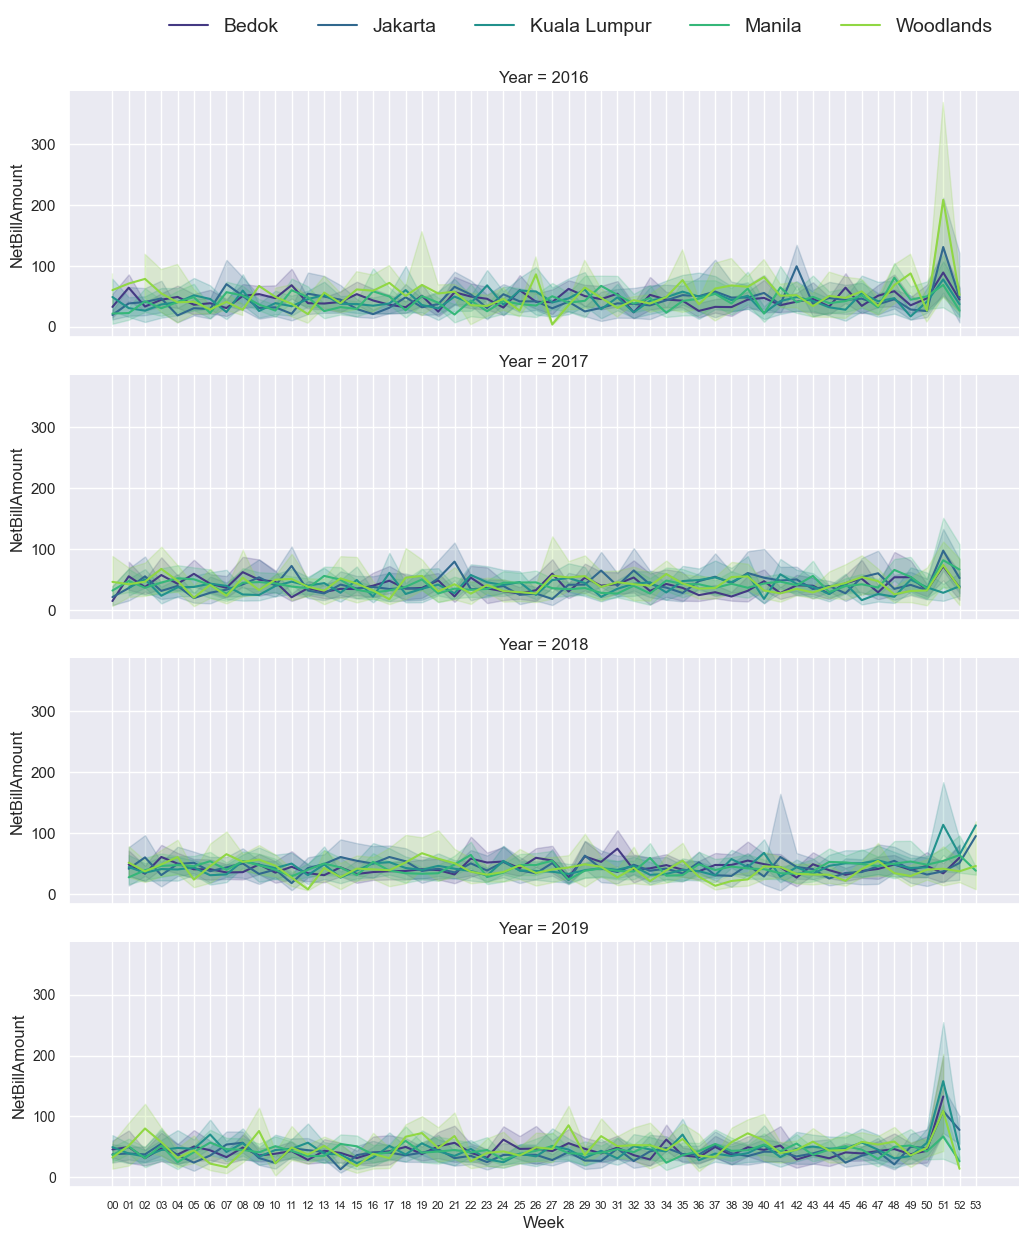

In [53]:
g = sns.relplot(
    data=df_clean_receipt, palette="viridis", x="Week", y="NetBillAmount",
    row="Year", estimator = "mean", hue="City",kind="line", height=3, aspect= 3.5
)

sns.move_legend(
    g, "lower center", fontsize="14",
    bbox_to_anchor=(.5, 1), ncol=len(df_clean_receipt["City"].unique()), title=None, frameon=False,
)

plt.yticks(fontsize=10)
plt.xticks(fontsize=8);

CONCLUSIONS: These graphs show a consistent trend from year to year - an increase in sales in the week leading up to the end of the year. However, we cannot confidently conclude that there are no other trends throughout the year. I believe that making any conclusions regarding trends is hindered by the very small amount of daily data and significant gaps in the data export, as we have previously discovered.

QUESTION: Now let's examine the sales for each store (city) over the entire observation period. We'll try to identify any cycles. We'll also use the average receipt amount as an assessment.

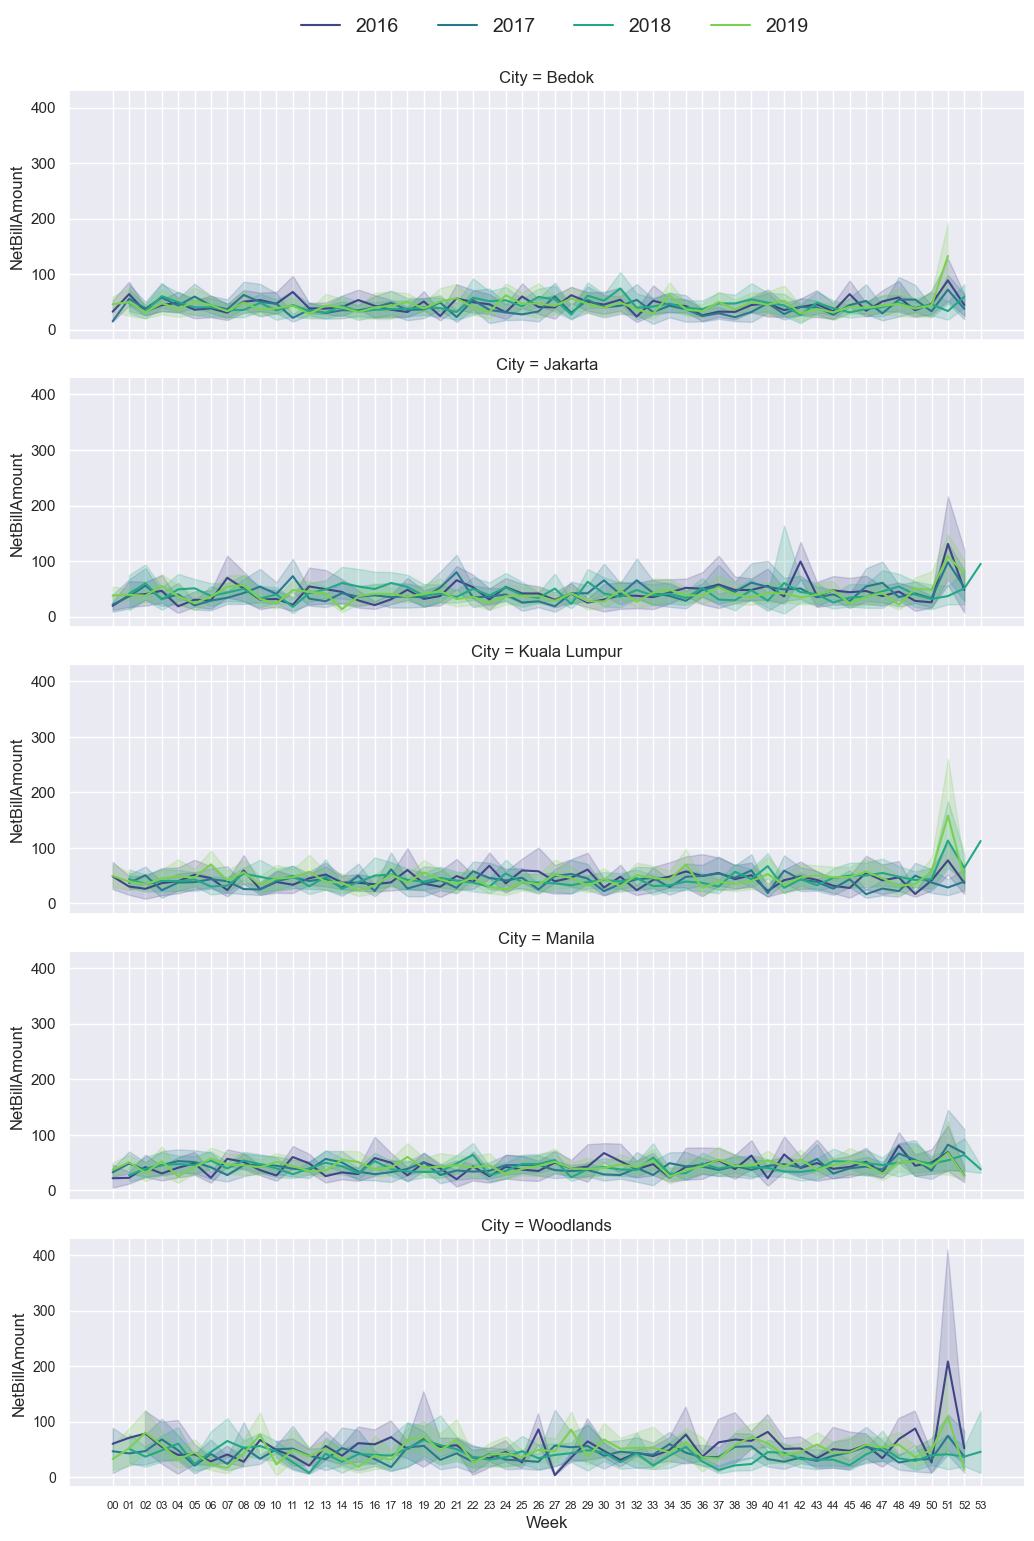

In [54]:
g = sns.relplot(
    data=df_clean_receipt, x="Week", y="NetBillAmount", hue="Year", estimator = "mean", row="City",
    kind="line", height=3, aspect= 3.5, palette="viridis"
)

sns.move_legend(
    g, "lower center", fontsize="14",
    bbox_to_anchor=(.5, 1), ncol=len(df_clean_receipt["Year"].unique()), title=None, frameon=False,
)

plt.yticks(fontsize=10)
plt.xticks(fontsize=8);

CONCLUSIONS: This analysis clearly indicates only one trend - a significant increase in sales in the 51st week of the year.

TASK: Let's evaluate the total sales for each city over the entire observation period.

''

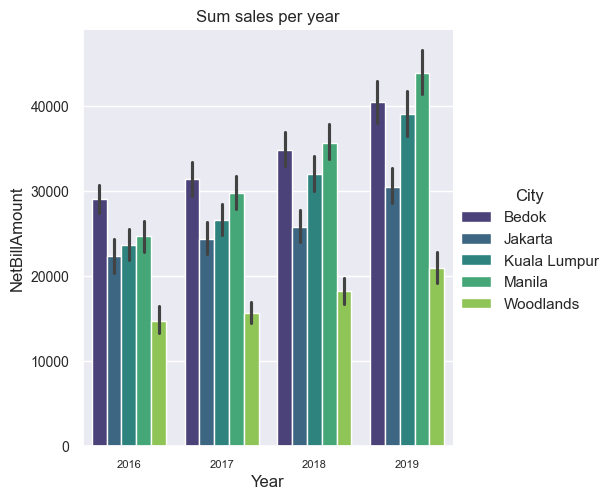

In [55]:
sns.set_style("darkgrid")

sns.catplot(
    data=df_clean_receipt, x="Year", y="NetBillAmount", estimator = "sum",
    hue="City", palette="viridis", kind="bar"
)

sns.move_legend(
    g, "lower center", fontsize="14",
    bbox_to_anchor=(.5, 1), ncol=len(df_clean_receipt["City"].unique()), title=None, frameon=False,
)

plt.yticks(fontsize=10)
plt.xticks(fontsize=8)
plt.title('Sum sales per year')
;

CONCLUSIONS: The graph indicates that all supermarkets show a trend of increasing total revenue. Additionally, it's clear from the graphs that the supermarket in the Woodlands city lags significantly behind in terms of revenue. Similar conclusions were drawn earlier, and at that time, we hypothesized that it is crucial to understand why there are so many missing data in the export for this store. This fact could heavily distort the actual sales picture, potentially leading us to make incorrect conclusions.





TASK: Let's analyze the distribution of receipt amounts and the number of purchases (store visits) based on gender. Next, we'll check if any differences, if detected, are statistically significant.

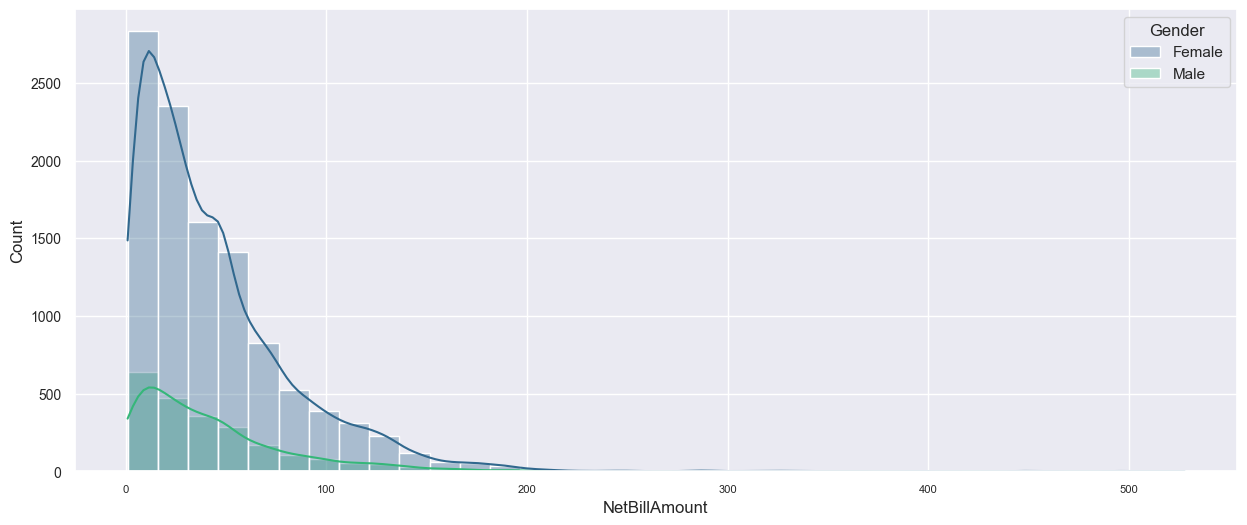

In [56]:
sns.histplot(
    data=df_clean_receipt.sort_values(by=['Gender']), binwidth=15,
    alpha=0.35, palette="viridis",
    x = 'NetBillAmount', hue="Gender", kde=True
)

plt.yticks(fontsize=10)
plt.xticks(fontsize=8);

In [57]:
df_gender_stat = df_clean_receipt.groupby(
    by="Gender",
    observed=True,
    as_index=False
).agg({
    "NetBillAmount": "mean",
    "Receipt Number": "count"
})
df_gender_stat

,Gender,NetBillAmount,Receipt Number
0,Female,43.493114,10788
1,Male,41.675428,2260


In [58]:
'''
Null Hypothesis (HO): The average receipt amount is the same for males and females.
Alternative Hypothesis (H1): Women purchase more than men.
'''
alpha = 0.05


data_m = df_clean_receipt[df_clean_receipt["Gender"] == "Male"].NetBillAmount
data_f = df_clean_receipt[df_clean_receipt["Gender"] == "Female"].NetBillAmount
ztest_Score, p_value = ztest(data_m, data_f, value=0)

if(p_value <  alpha):
    print("We reject the null hypothesis (H0). Women make more purchases than men.")
else:
    print("Null hypothesis (H0) cannot be rejected, it means that there is not enough evidence to conclude that there is a difference. The average receipt amount is the same for both males and females.")

We reject the null hypothesis (H0). Women make more purchases than men.


In [59]:
corr_data= df_clean_receipt[["Age","Week","NetBillAmount"]]
corr_data.corr()

,Age,Week,NetBillAmount
Age,1.000000,-0.020258,0.001184
Week,-0.020258,1.000000,0.048819
NetBillAmount,0.001184,0.048819,1.000000


CONCLUSIONS: The graph clearly shows that women make more purchases, and overall, their purchases are more expensive. This conclusion is further supported by the statistics on the number of purchases by gender and the average receipt amount. Furthermore, based on the statistical hypothesis testing, we verified whether women indeed make more purchases and supported this assumption. Additionally, it was interesting to assess the correlation between factors such as age/week of purchase and receipt amount. However, we did not obtain any significant data in this regard; correlation coefficients are too small to make strong conclusions about the presence of any dependencies.

TASK:  Let's assess the profitability of each store. Which store is the most profitable?

In [60]:
max_gross_supermarket_USD = df_clean.groupby(
    by='City',observed=True)['Profit Margin'].sum().sort_values(ascending=False).to_frame()

max_gross_supermarket_persent = df_clean.groupby(
    by='City',observed=True)['% Profit Margin'].mean().sort_values(ascending=False).to_frame()


max_gross_supermarket = max_gross_supermarket_USD.merge(max_gross_supermarket_persent, on="City")


display(max_gross_supermarket.style.background_gradient(cmap='viridis', axis = 0))

,Profit Margin,% Profit Margin
City,,
Bedok,14649.595750,0.105882
Manila,14455.633460,0.105721
Kuala Lumpur,12958.115340,0.105195
Jakarta,11068.595120,0.105280
Woodlands,7489.298080,0.105561


CONCLUSIONS: The most profitable store is the one in Bedok city. It's important to note that the margin level is approximately the same across all cities.

In [61]:
#Let's export the prepared DataFrame to a file for further processing in the Tableau environment.
df_clean.to_excel("data/Grocery_Database_clean.xlsx")  

In [62]:
list(df_clean.columns)

['Receipt Number',
 'Date',
 'Year',
 'Weekday',
 'Week',
 'Month',
 'Time',
 'Mobile Number',
 'Membership ID',
 'Loyalty Card Points',
 'Age',
 'Gender',
 'City',
 'Country',
 'Category',
 'Sub_Category',
 'Items',
 'Brand ',
 'Description ',
 'Price',
 'QTY',
 'DISC',
 'Amount',
 'GST',
 'Payment Mode',
 'Bank Name',
 '% Profit Margin',
 '% Operating Cost',
 '% Product Cost',
 'Profit Margin',
 'Operating Cost',
 'Product Cost']

In [63]:
df_clean.to_csv("data/Grocery_Database_clean.csv")  